/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


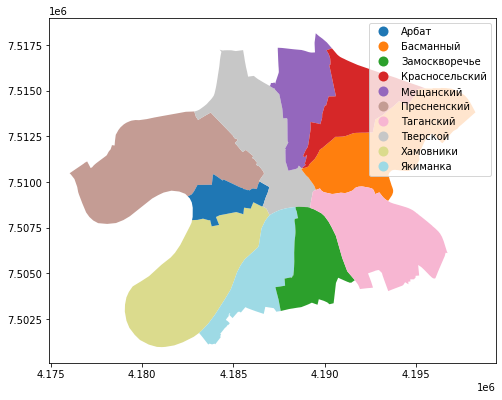

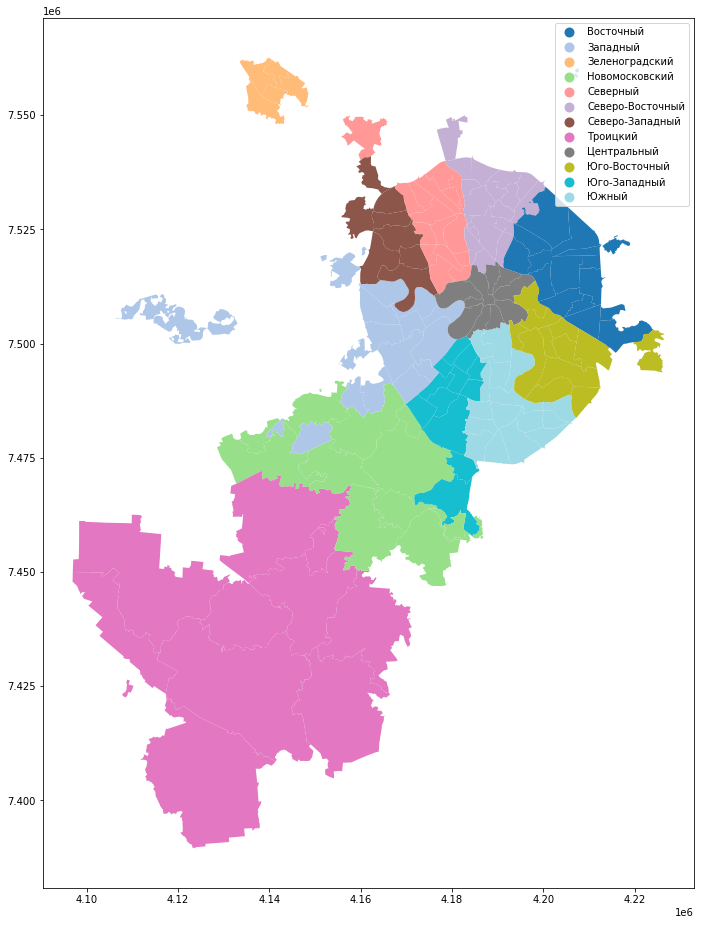

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

data = gpd.read_file("http://digo.ee/moscow.json")
data = data.to_crs({'init' : 'epsg:3857'})
fig = plt.figure(figsize=(8,8))
area = plt.subplot(1, 1, 1)
data[data["NAME_AO"] == "Центральный"].plot(ax=area, legend=True,
                                           column="NAME", cmap="tab20")
plt.show()

fig = plt.figure(figsize=(20,16))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="NAME_AO", cmap="tab20")
plt.show()

/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


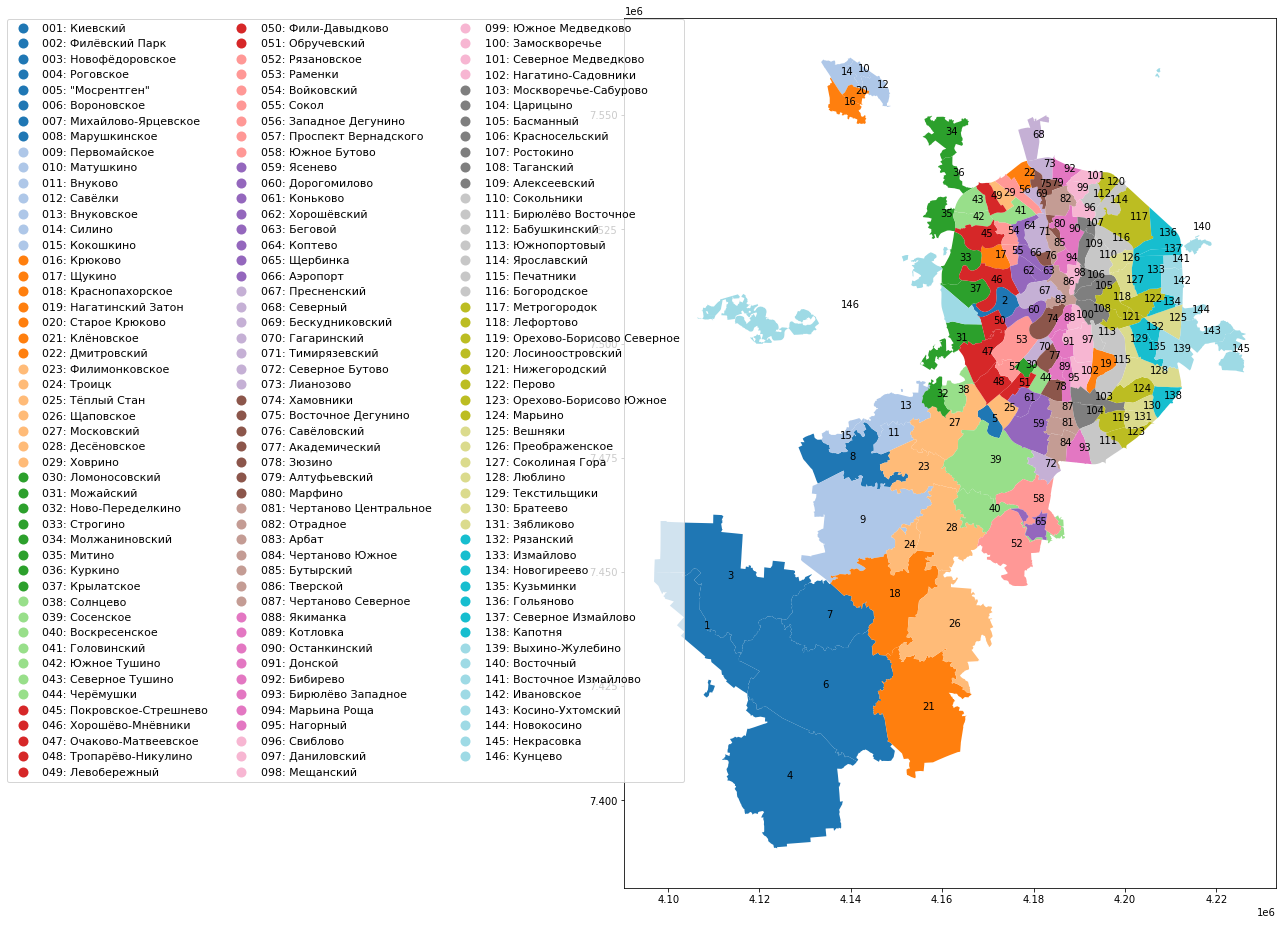

In [6]:
#Картограмма с подписями

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

def fill_zero (a):
    if len(a) < 3:
        return fill_zero("0" + a)
    else:
        return a

data = gpd.read_file("http://digo.ee/moscow.json")
data = data.to_crs({'init' : 'epsg:3857'})
data["ID"] = range(1, len(data)+1)
data["Title"] = data["ID"].astype(str).apply(fill_zero) + ": " + data["NAME"].astype(str)
fig = plt.figure(figsize=(20,16))
area = plt.subplot(1, 1, 1)
data.plot(ax = area, legend=True, column="Title",
             linewidth=0.5, cmap="tab20",
             legend_kwds = {"ncol": 3,
                           "bbox_to_anchor": (0, 1.005, 0.1, 0),
                           "fontsize": 11})
for _,adm in data.iterrows():
    area.annotate(adm.ID,
                  xy=(adm.geometry.centroid.x, adm.geometry.centroid.y))
plt.show()

/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


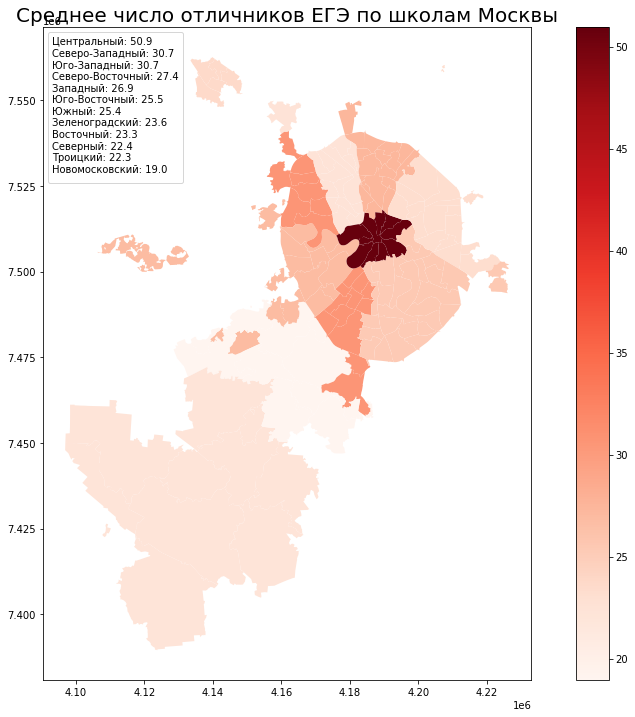

In [9]:
#Фоновая картограмма

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

data_ege = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data_ege["AdmArea"] = data_ege["AdmArea"].apply(lambda x:x.split(" ")[0])
best = data_ege.groupby("AdmArea").mean().sort_values("PASSES_OVER_220", ascending=False).reset_index()
best["Title"] = best["AdmArea"].astype(str) + ": " + round(best['PASSES_OVER_220'], 1).astype(str)

data = gpd.read_file("http://digo.ee/moscow.json")
data = data.to_crs({'init': 'epsg:3857'})
data = pd.merge(left=data, right=best,
               left_on="NAME_AO", right_on="AdmArea", how="left")

fig = plt.figure(figsize=(16,12))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="PASSES_OVER_220", cmap="Reds")
area.legend([], title="\n".join(best.Title), loc="upper left")
plt.title("Среднее число отличников ЕГЭ по школам Москвы", fontsize=20)
plt.show()

/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


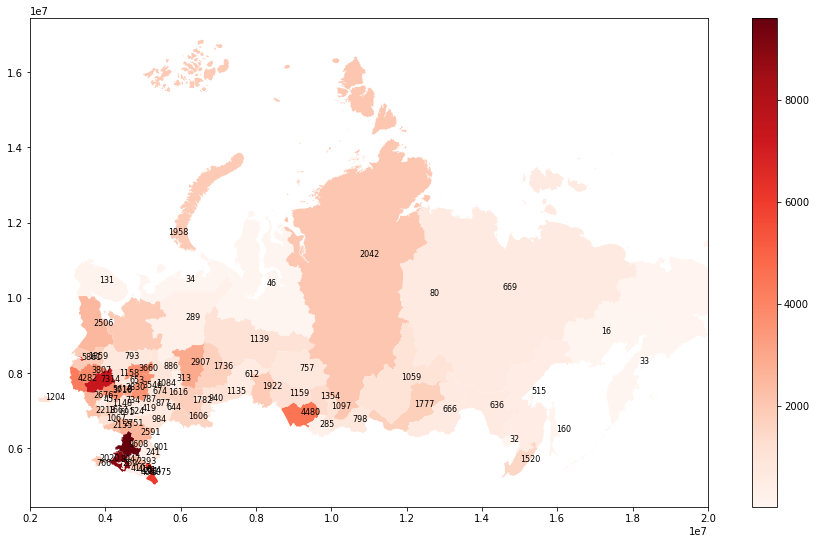

11    4480
Name: Объект, dtype: int64

In [15]:
%matplotlib inline

import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt

import descartes

pd.options.display.max_rows = 999



data = pd.read_csv("digo.ee/data-44-structure-4.csv", usecols=["Объект","Регион"])

data["Регион"] = data["Регион"].str.upper()

data = data.groupby("Регион").count()

geo = gpd.read_file("digo.ee/russia.json")

geo = geo.to_crs({'init' :'epsg:3857'})

geo["NL_NAME_1"] = geo["NL_NAME_1"].str.upper()

geo = geo.replace({"ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",

                  "РЕСПУБЛИКА АДЫГЕЯ" : "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",

                  "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",

                  "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",

                  "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",

                  "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"})

geo = pd.merge(left=geo, right=data,

              left_on="NL_NAME_1", right_on="Регион", how="left")



fig = plt.figure(figsize=(16,9))

area = plt.subplot(1, 1, 1)

geo.plot(ax=area, legend=True, column="Объект", cmap="Reds")

area.set_xlim(2e6, 2e7)

for _, region in geo.iterrows():

    area.annotate(region["Объект"], xy=(region.geometry.centroid.x,region.geometry.centroid.y), fontsize=8)



plt.show()

geo[geo["NL_NAME_1"] == "АЛТАЙСКИЙ КРАЙ"]["Объект"]